# Assignment 2, Qilin Zhou, 01/20/2024

## Question 1

In [1]:
import sklearn
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### KNeighborsClassifier Classifier with default settings

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
knn_clf = KNeighborsClassifier(n_jobs=-1)

In [5]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [6]:
knn_pred = knn_clf.predict(X_test)

In [7]:
accuracy = (knn_pred == y_test).sum() / len(y_test)
print(accuracy)

0.9688


The kNeighborsClassifier with default settings produces around 96.88% accuracy on the test set. 

### Grid Search - Fine Tuning KNeighborsClassifier

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = [{'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance']}]

In [10]:
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 5, 11, 19],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [12]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

Change the hyperparameter value accordingly

In [13]:
knn_clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [14]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [15]:
knn_pred = knn_clf.predict(X_test)

In [16]:
accuracy = (knn_pred == y_test).sum() / len(y_test)
print(accuracy)

0.9717


It now achieved over 97% accuracy on the test set.

## Question 2

In [18]:
from scipy.ndimage.interpolation import shift

/var/folders/97/r7d175650dg4fx0f_n5km01w0000gn/T/ipykernel_12634/987197595.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [19]:
def shift_image(digit, step=1):
    size = 28
    digit_image = digit.reshape((size, size))
    up = shift(digit_image, (-step, 0))
    down = shift(digit_image, (step, 0))
    left = shift(digit_image, (0, -step))
    right = shift(digit_image, (0, step))

    shifted_copies = np.concatenate([image.reshape(1, size**2) for image in [digit_image, up, down, left, right]])
    return shifted_copies

In [20]:
X_train_expanded = np.concatenate([shift_image(image) for image in X_train])

In [22]:
y_train_expanded = y_train.repeat(5)

In [24]:
# Continue with knn_clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance') in question_1
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [25]:
knn_pred = knn_clf.predict(X_test)

In [26]:
accuracy = (knn_pred == y_test).sum() / len(y_test)
print(accuracy)

0.9763


It now achieved better accuracy score on the test set, with 97.63% accuracy.

## Question 3

In [35]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

### Create a random classifier

In [36]:
np.random.seed(42)
y_train_true = np.random.randint(0, 2, 60000)
y_scores = np.random.rand(60000)

In [37]:
fpr, tpr, _ = roc_curve(y_train_true, y_scores)

In [52]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=3, color = 'orange', label=label)
    plt.plot([0, 1], [0, 1], 'k:')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

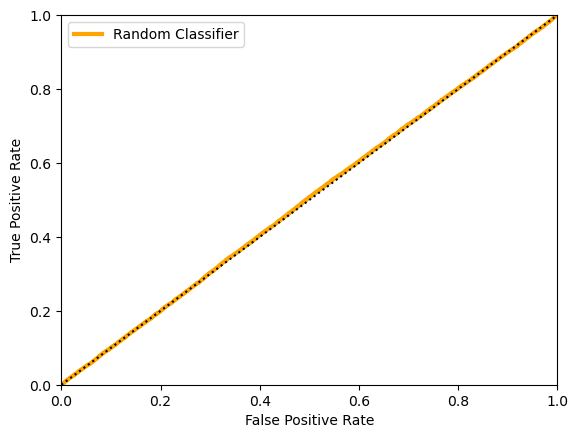

In [53]:
plot_roc_curve(fpr, tpr, 'Random Classifier')
plt.legend()
plt.show()

We can see that for a purely random classifier ROC is the orange diagonal line that matches the dotted line.